In [ ]:
import os
import tarfile
import urllib
import numpy as np 
import matplotlib.pyplot as plt
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing=load_housing_data()
housing

In [12]:
housing.iloc[1:2,1:4]

,latitude,housing_median_age,total_rooms
1,37.86,21.0,7099.0


In [3]:
housing["app"]=housing.loc[housing.latitude==37]

ValueError: Wrong number of items passed 10, placement implies 1

In [361]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [362]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [363]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B8F6EBBC8>,
      dtype=object)

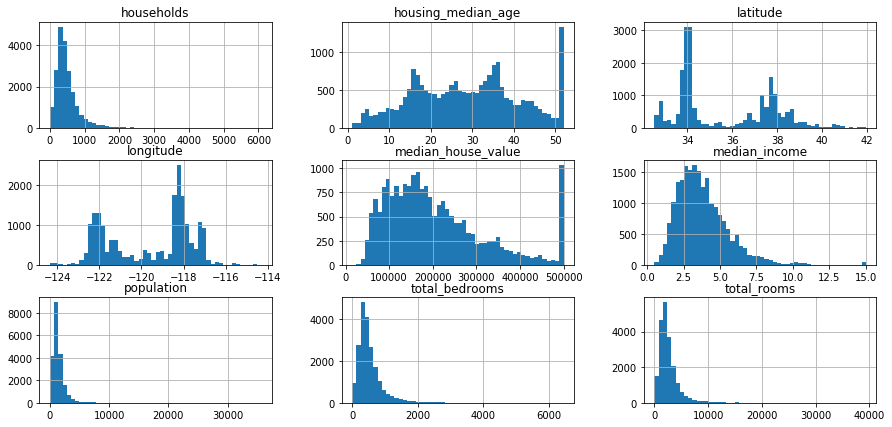

In [364]:
housing.hist(bins=50,figsize=(15,7))

In [365]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)

In [366]:
housing.median_income.head(5)

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64

**Gelirin kategorize edilmesi:** |bununyapılmasının sebebi, rastgele train-test kümelerini seçerken verinin belli kısımlarından doğru oranlarda almak, yani örneğin, bir popülasyonun %80i kedi %20 si köpekse, örneklerin %0sini köpekten %50 sini kediden almak gibi bir hata yapmak yerine yine %80 kedi %20 köpekten almayı sağlar.

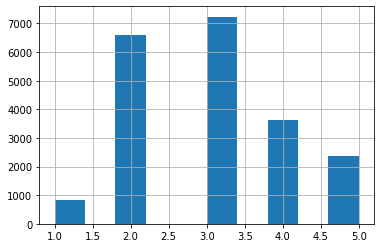

In [367]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing.income_cat.hist()

Şimdi income/Gelir kategorisine göre tabakalı örnekleme yapmaya hazırsınız. Bunun için Scikit-Learn StratifiedShuffleSplitsınıfını kullanabilirsiniz:

In [368]:
from sklearn.model_selection import StratifiedShuffleSplit
#bize bir generator dondurur.
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
split.split(housing, housing["income_cat"])


<generator object BaseShuffleSplit.split at 0x0000022B8F94E348>

In [369]:
#generator oldugu icin dongu ile aldık(bu cumleyi teyitlemeliyim .d). Tek sefer döngüye girdik.
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

Bunun beklendiği gibi çalışıp çalışmadığını görelim. Test setindeki gelir kategorisi oranlarına bakarak başlayabilirsiniz:

In [370]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [371]:
strat_test_set["income_cat"]

5241     5
10970    4
20351    3
6568     3
13285    3
        ..
20519    2
17430    2
4019     4
12107    4
2398     3
Name: income_cat, Length: 4128, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [372]:
#veriyi eski haline döndür.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [373]:
strat_train_set.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN


İyi bir nedenden ötürü test seti oluşturmaya oldukça fazla zaman harcadık: Bu, genellikle ihmal edilen ancak bir Makine Öğrenimi projesinin kritik bir parçasıdır. Dahası, bu fikirlerin çoğu daha sonra çapraz doğrulamayı tartıştığımızda faydalı olacaktır. Şimdi bir sonraki aşamaya geçme zamanı: verileri keşfetme.

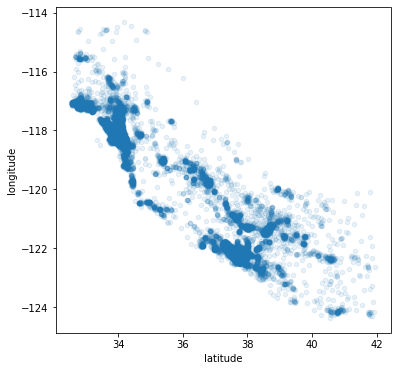

In [374]:
housing=strat_train_set.copy()
housing.plot(kind="scatter", x="latitude", y="longitude",alpha=0.1, figsize=(6,6))
#latitude=enlem | longitude=boylam

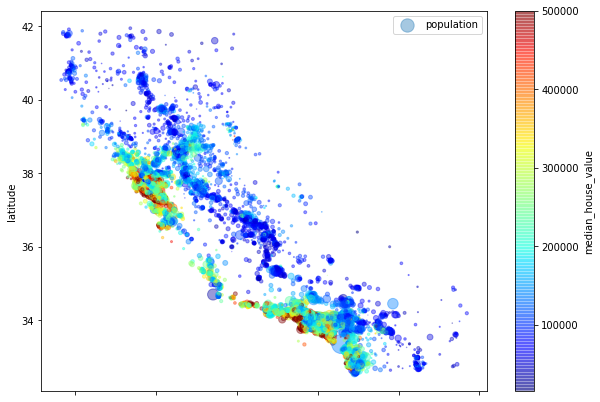

In [375]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
            s=housing.population/100,label= "population",c="median_house_value",
            cmap=plt.get_cmap("jet"))

In [376]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"]

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

birbiri ile ilişkili değişkenlere biraz daha odaklanılırsa: 

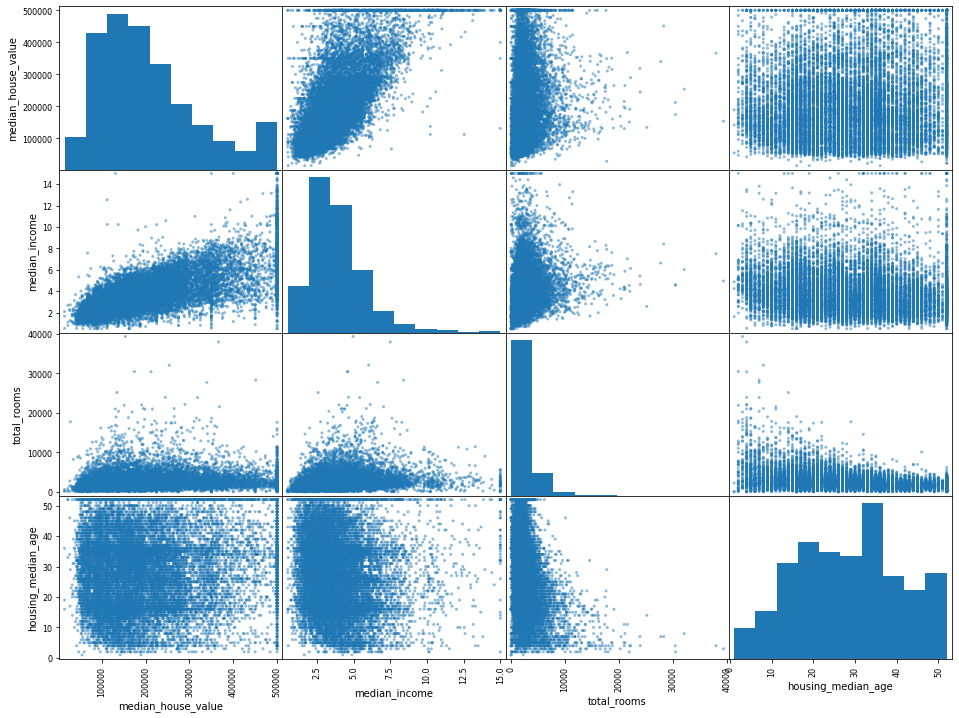

In [377]:
attributes=["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(16,12));

median income-medihan house valude ilişkisine yakınd;anbakacak olursak:

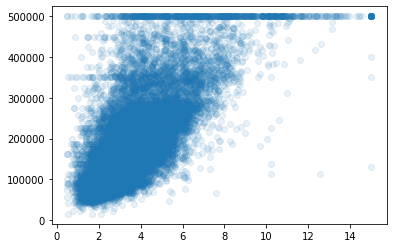

In [378]:

plt.scatter(x=housing["median_income"],y=housing["median_house_value"],alpha=0.1)

yukarıdaki grafikte 350 ve 450 degerleri içinde sıradışı bir şey görülüyor

**"Algoritmalarınızın bu veri tuhaflıklarını yeniden üretmeyi öğrenmesini önlemek için ilgili bölgeleri kaldırmayı deneyebilirsiniz."**

Özellikler/Attributes arası ilişkilendirmeler bazen daha etkili ilişkiler ortaya çıkarır, örneğin, direkt total yatakodası değil de, hane başına düşen yatak odası sayısını özellik oalrak eklersek fiyat ile daha ilişkili olabilir. 

In [379]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

görüldüğü gibi, örneğin hane başına yatakodası sayısı sadece yatak oda sı veya hane sayısından çok daha etkili.

## Prepare data for ML algorithms

**Bu işlemleri fonksiyonlar yazarak yapmak birkaç nedenden dolayı mantıklıdır:**
   * 1-Baska datalarda da uygulayabilirsiniz
   * 2-Gelecekteki projelerde tekrar kullanılabilir
   * 3- Canlı sistemelrde yeni gelen verinin düzenlenmesi icin kullanılabilir.
   * 4- bu cesit donusumleri kolayca denemenizi ve varklı kombinasyonalr arasında daha koaly karar verebilmeyi sağlar 

In [380]:
# once temiz eğitim setimize tekrar bir dönelim: verisetimizinin su anki hali su:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965


In [381]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN


#### Data cleaning

**Ustte goruldugu gibi total bedroom özelliginde eksik degelrer vardı. Bunları duzenlemek icin 3 secenek vardır.**

   * Total bedroom ozelligini kaldırmak,
   * Eksik degerlerin oldugu satırları silmek,
   * Fillna ile uygun degerleri doldurmak.

In [382]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) #numerik özellikler
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [383]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [384]:
housing_tr.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042


#### Handling Text and Categorical Attributes

In [385]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [386]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**Not:** Burada dönen bir numoy array i değildir, sparse matristir. Bu milyonlarca özellik olduğunda avantaj sağlar.

After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements. You can use it mostly like a normal 2D array,21 but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [387]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [388]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**TIP**

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the ocean_proximity feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita).

In [389]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            print(np.c_[X, rooms_per_household, population_per_household])
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

### Feature Scaling

**There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.**
   * Min-Max: values are shifted and rescaled so that they end up ranging from 0 to 1.
   * Standardization: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers.
   
   * As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data).

As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set)

PipelineYapıcı adımların sırası tanımlayan adı / tahmin çiftlerinin bir listesini alır. Son tahminci hariç tümü transformatör olmalıdır (yani, bir fit_transform()yöntemi olmalıdır ).

In [390]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# simpleImputer yukarıda, "from sklearn.impute import SimpleImputer" seklinde tanımlanmıştı
# Bu pipeline numerik-sayısal özellikler içindir.
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
pd.DataFrame(housing_num_tr)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407


So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient/uygun to have a single transformer able to handle all columns, applying the appropriate transformations to each column. In version 0.20, Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news is that it works great with pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [391]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [392]:
from sklearn.compose import ColumnTransformer
#numerik ve kategorik column isimleri verildi.
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
# a transformer, and a list of names (or indices) of 
# columns that the transformer should be applied to.
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),# num_pipeline'ı zaten biz yazmıştık
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

**Linear Regression:**

In [393]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [394]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [395]:
from sklearn.metrics import mean_squared_error
housing_predictions= lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels, housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

Pek tatmin edici bir hata değil. daha karmaşık bir algoritma deneyelim : **Decision Trees**

In [396]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

ahhaehahehea 0 hata. Modeli ezberledi :P

**!!Better Evaluation Using Cross-Validation**

Karar agacı yöntemi lineer modelden de kötü çıktı... Şimdi, çarpraz doğrulamayı lineer modele uygulayalım birde:

In [399]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798349


Let’s try one last model now: The **RandomForestRegressor**

In [400]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=4)

In [401]:
forest_rmse_scores = np.sqrt(-scores)
forest_rmse=np.sqrt(mean_squared_error(forest_reg.predict(housing_prepared),
                                        housing_labels))
print(forest_rmse)
display_scores(forest_rmse_scores)

18601.018312802193
Scores: [49706.05378994 47699.49568647 49897.98481252 52433.5156883
 49527.70254761 53360.72631615 48753.25508569 48340.4536845
 53374.30429637 49841.7326964 ]
Mean: 50293.52246039328
Standard deviation: 1941.3028347281765


You should save every model you experiment with so that you can come back easily to any model you want. Make sure you save both the hyperparameters and the trained parameters, as well as the cross-validation scores and perhaps the actual predictions as well. This will allow you to easily compare scores across model types, and compare the types of errors they make. You can easily save Scikit-Learn models by using Python’s pickle module or by using the joblib library, which is more efficient at serializing large NumPy arrays (you can install this library using pip):

In [52]:
#bu kod sonra araştırılacak.
#import joblib
#joblib.dump(my_model, "my_model.pkl")
## and later...
#my_model_loaded = joblib.load("my_model.pkl")

## Fine-Tune Your Model

Umut veren modelleri seçip, bu modellerin hiperparametreleri için ince ayar yapmak gerekecek. Örneğin:

In [73]:
from sklearn.model_selection import GridSearchCV
forest_reg=RandomForestRegressor()
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
grid_search=GridSearchCV(forest_reg, param_grid, cv=5, 
                        scoring='neg_mean_squared_error',
                        return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [75]:
#direkt en iyi tahminciyi de alabiliriz:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [126]:
rf_model=RandomForestRegressor(max_features=6, n_estimators=30)
rf_model.fit(housing_prepared, housing_labels)
rf_cv_scores=cross_val_score(rf_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10);
rf_rmse_scores = np.sqrt(-rf_cv_scores)
display_scores(rf_rmse_scores)

Scores: [50808.77878528 50977.38250284 52500.13130867 53652.05545258
 52383.92074162 55540.43140446 50324.31113011 50858.69669271
 55873.77499231 51767.50353458]
Mean: 52468.698654514636
Standard deviation: 1873.502927023992


NOTE
If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

62880.060183546826 {'max_features': 2, 'n_estimators': 3}
55790.80559069534 {'max_features': 2, 'n_estimators': 10}
52860.946702009365 {'max_features': 2, 'n_estimators': 30}
60318.38118414434 {'max_features': 4, 'n_estimators': 3}
52440.13068589985 {'max_features': 4, 'n_estimators': 10}
50533.671599168665 {'max_features': 4, 'n_estimators': 30}
59168.61886675991 {'max_features': 6, 'n_estimators': 3}
52544.886841039595 {'max_features': 6, 'n_estimators': 10}
49922.31076350579 {'max_features': 6, 'n_estimators': 30}
58341.42472429154 {'max_features': 8, 'n_estimators': 3}
51868.57851247044 {'max_features': 8, 'n_estimators': 10}
50133.16810222516 {'max_features': 8, 'n_estimators': 30}
62494.49650311676 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53918.27468792984 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59589.279683298955 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.41325784337 {'bootstrap': False, 'max_features': 3, 'n_estimators

**NOTE** Denenecek çok fazla hiperparametre olduğunda **RandomizedSearchCV** kullanılabilir 

### Ensemble Methods
    Bir sürü iyi modelin takım çalışması. Chapter 7 de araştırılacak.

##### Analyze the Best Models and Their Errors

    For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.50856510e-02, 6.97796025e-02, 4.10843307e-02, 1.76388313e-02,
       1.65514508e-02, 1.73086182e-02, 1.56541373e-02, 3.13663708e-01,
       5.66148648e-02, 1.07900686e-01, 8.46728406e-02, 1.04078950e-02,
       1.66835530e-01, 1.05153170e-04, 3.18452844e-03, 3.51217216e-03])

In [58]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# categorik degiskenlere one hot donusumu yapildi
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31366370802663457, 'median_income'),
 (0.166835530297679, 'INLAND'),
 (0.1079006857041097, 'pop_per_hhold'),
 (0.0846728406172811, 'bedrooms_per_room'),
 (0.07508565103238748, 'longitude'),
 (0.06977960252976925, 'latitude'),
 (0.05661486483235171, 'rooms_per_hhold'),
 (0.04108433067066364, 'housing_median_age'),
 (0.017638831286998797, 'total_rooms'),
 (0.017308618168515942, 'population'),
 (0.016551450783534715, 'total_bedrooms'),
 (0.015654137304470902, 'households'),
 (0.010407894967074153, '<1H OCEAN'),
 (0.003512172163318966, 'NEAR OCEAN'),
 (0.003184528444748808, 'NEAR BAY'),
 (0.00010515317046125369, 'ISLAND')]

**!!You should also look at the specific errors that your system makes, then try to understand why it makes them and what could fix the problem (adding extra features or getting rid of uninformative ones, cleaning up outliers, etc.).!!**

### Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set.

There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set:

In [59]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,730.2
final_rmse

47587.45086011089

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval():

In [60]:
from scipy import stats
confidence=0.95
squared_errors=(final_predictions-y_test)**2 #hata kareler
# bu kısım istatistiksel bir kaç sabitten oluşuyor.
np.sqrt(stats.t.interval( # güven aralığı | t istatistiği
       confidence,#güven aralığı
       len(squared_errors)-1,#hata dizisinin uzunluğı
       loc=squared_errors.mean(),#hataların ortalaması
       scale=stats.sem(squared_errors)))#ortalamanın standart hatası

array([45634.97885252, 49462.91200341])

## Launch, Monitor, and Maintain Your System

Finally we got a model that can be implement to our system. there is a different ways to do this,
 One way to do this is to save the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its predict() method.
 
 Another popular strategy is to deploy your model on the cloud, for example on Google Cloud AI Platform (formerly known as Google Cloud ML Engine): just save your model using joblib and upload it to Google Cloud Storage (GCS), then head over to Google Cloud AI Platform and create a new model version, pointing it to the GCS file. That’s it! This gives you a simple web service that takes care of load balancing and scaling for you. It takes JSON requests containing the input data (e.g., of a district) and returns JSON responses containing the predictions. You can then use this web service in your website (or whatever production environment you are using). As we will see in Chapter 19, deploying TensorFlow models on AI Platform is not much different from deploying Scikit-Learn models.

However, its not over. Models may wants to be change becaus real situations may be change. It may be necessary to produce different solutions for different potential problems.

If the data keeps evolving, you will need to update your datasets and retrain your model regularly. You should probably automate the whole process as much as possible. Here are a few things you can automate:

    Collect fresh data regularly and label it (e.g., using human raters).
    
    Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.
    
    Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why).

## EXERCİSES

#### 1-> Try Support Vector Machine  regressor with verious hip.params. 

In [94]:
from sklearn.svm import SVR
SVR()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
from sklearn.svm import SVR
svr_model=SVR()
svr_params_grid={
    'kernel':["linear","rbf"],
    'C':[2,3],
    'gamma':[0.003,0.01]
}
grid_search_svr=GridSearchCV(svr_model, svr_params_grid, cv=5, scoring="neg_mean_squared_error",n_jobs=-1)
grid_search_svr.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2, 3], 'gamma': [0.003, 0.01],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [107]:
cvres = grid_search_svr.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

107136.26398576611 {'C': 2, 'gamma': 0.003, 'kernel': 'linear'}
118841.67995959362 {'C': 2, 'gamma': 0.003, 'kernel': 'rbf'}
107136.26398576611 {'C': 2, 'gamma': 0.01, 'kernel': 'linear'}
118699.50805731423 {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
102396.58394521184 {'C': 3, 'gamma': 0.003, 'kernel': 'linear'}
118804.83305481952 {'C': 3, 'gamma': 0.003, 'kernel': 'rbf'}
102396.58394521184 {'C': 3, 'gamma': 0.01, 'kernel': 'linear'}
118596.16891020472 {'C': 3, 'gamma': 0.01, 'kernel': 'rbf'}


In [108]:
grid_search_svr.best_params_

{'C': 3, 'gamma': 0.003, 'kernel': 'linear'}

In [109]:
svr_model_tuned=SVR(C=3,gamma=0.003,kernel='linear')
svr_model_tuned.fit(housing_prepared,housing_labels)

SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.003,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [118]:
svr_cross_val_score=cross_val_score(svr_model_tuned,housing_prepared,housing_labels,
                scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-svr_cross_val_score)svr_rmse_scores

array([ 95538.54200033, 101020.0038945 ,  99093.70468919, 101946.62950846,
        99417.15503213, 104776.1900509 ,  99202.44882105, 102826.2704972 ,
       103148.86131643, 100842.76807653])

In [119]:
#Ortalama rmse degeri:
svr_rmse_scores.mean()

100781.25738867166

Sonuç o kadar kötü çıktı ki, bir hata mı yaptım diye kontrol ettim. Parametre ayarında mı bir sorun var diye defaul hali ile, hiç hiperparametre ayarı yapmadan modeli yine kuracağım:

In [120]:
svr_default=SVR()
svr_default.fit(housing_prepared,housing_labels)
svr_cross_val_score=cross_val_score(svr_default,housing_prepared,housing_labels,
                scoring="neg_mean_squared_error", cv=5)
svr_rmse_scores = np.sqrt(-svr_cross_val_score)
svr_rmse_scores.mean()

118620.45813065572

Evet, SVR bayağı kötüymüş, bu veri için. 

#### 2-> Try replacing GridSearchCV with RandomizedSearchCV.

In [129]:
from sklearn.model_selection import RandomizedSearchCV
forest_reg=RandomForestRegressor()
param_grid = {
    'n_estimators': [30,50,100],
    'max_features': [4,7,10],
    'min_samples_split': [3,7,10],
    }
randomizedSearchCV=RandomizedSearchCV(estimator = forest_reg, param_distributions = param_grid, n_iter = 4, cv = 2, verbose=0, random_state=42 , n_jobs = -1)
randomizedSearchCV.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [130]:
randomizedSearchCV.best_params_

{'n_estimators': 50, 'min_samples_split': 7, 'max_features': 7}

In [131]:
rf_model=randomizedSearchCV.best_estimator_
rf_model.fit(housing_prepared, housing_labels)
rf_cv_scores=cross_val_score(rf_model, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10);
rf_rmse_scores = np.sqrt(-rf_cv_scores)
display_scores(rf_rmse_scores)

Scores: [48914.5243937  46594.79412302 49822.11176665 51013.35476065
 48266.26295012 51999.10996522 48126.41609771 47555.06145036
 52283.39471287 48364.37937535]
Mean: 49293.94095956422
Standard deviation: 1822.813621008285


**AAAAAa, Mean sq. er. degerimiz azzzıcızk daha düstü. NNiiceee..**

#### 3->Try adding a transformer in the preparation pipeline to select only the most important attributes and Try creating a single pipeline that does the full data preparation plus the final prediction.

As we remember, we defined pipeline above. To remember, let's define again, up:

In [406]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [476]:
from sklearn.pipeline import make_pipeline
pp=make_pipeline(
    full_pipeline,
    SelectKBest(f_regression,k=3),
    RandomForestRegressor(n_estimators=30)
)
pp.fit(housing,housing_labels)
prediction = pp.predict(housing)
prediction

array([246070.        , 309718.44444444, 210823.33333333, ...,
       119556.38888889, 199400.94973545, 380977.12      ])

In [477]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pp,housing,housing_labels,
                         scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)

In [478]:
tree_rmse_scores.mean()

87600.80845727013